In [1]:
import cv2
import json
import math
import os
import os.path
import re
import tempfile
from matplotlib import pyplot
from util import quickstart as util
from trainer import modelDesign as training_model

Using TensorFlow backend.
/home/islab/.local/share/virtualenvs/depth_prediction-uX_uZt9E/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/islab/.local/share/virtualenvs/depth_prediction-uX_uZt9E/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/islab/.local/share/virtualenvs/depth_prediction-uX_uZt9E/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) /

## Parameters Setting

In [2]:
# 欲載入 pretrain weight 的路徑
MODEL_WEIGHT_PATH = '/home/islab/Documents/drone/depth_prediction/model/airsim_2020-01-14-16-42_epoch-001_loss-11.7183.h5'

# 資料路徑
DATA_PATH = '/home/islab/Documents/drone/depth_prediction/data/random/2019-12-12-04-54/image'
RESULT_PATH = '/home/islab/Documents/drone/depth_prediction/result/2019-12-05-05-49'

# Model Input 解析度設定
INPUT_HEIGHT = 320
INPUT_WIDTH = 384

# Video Output 解析度設定
OUTPUT_HEIGHT = 1440
OUTPUT_WIDTH = 1920

## Build Model

In [3]:
# 建立 model layer 架構
model = training_model.MNv2_segment_depth_multiloss_model(
    inputShape = (INPUT_HEIGHT, INPUT_WIDTH, 3), 
    alpha = 0.35, 
    expansion_factor = 6, 
    depth_multiplier = 1, 
    lock_backend_weights = False,
    CLASSES = 6,
)

# 載入 model weight
model.load_weights(MODEL_WEIGHT_PATH)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/home/islab/.local/share/virtualenvs/depth_prediction-uX_uZt9E/lib/python3.7/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 320, 384, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 [(None, 10, 12, 112) 261728      input_1[0][0]                    
__________________________________________________________________________________________________
subpixel_1 (Lambda)             (None, 20, 24, 28)   0           model_1[1][0]                    
__________________________________________________________________________________________________
conv_expand_1 (Conv2D)          (None, 20, 24, 168)  4704        subpixel_1[0][0]                 
____________________________________________________________________________________________

## Predict the Image and Save Result

[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
predicted dataset 2019-12-12-06-49-19
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[

KeyboardInterrupt: 

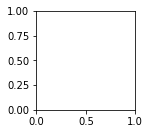

In [4]:
# iterate each dataset
for folder_name in os.listdir(DATA_PATH):
    # prepare result image folder
    result_image_folder_path = os.path.join(RESULT_PATH, 'image', folder_name)
    if not os.path.exists(result_image_folder_path):
        os.makedirs(result_image_folder_path)
    # iterate each image
    folder_path = os.path.join(DATA_PATH, folder_name) 
    for file_name in os.listdir(folder_path):
        # 讀取影像
        scene = util.read_image(os.path.join(folder_path, file_name), shape=(INPUT_HEIGHT,INPUT_WIDTH), rand=0)
        segment = util.read_image(
            os.path.join(folder_path.replace('image', 'seg'), file_name), 
            shape = (INPUT_HEIGHT,INPUT_WIDTH), 
        )
        # 使用 image 來預測出 depth map 和 semantic segmentation
        predict_depth, predict_segment, predict_risk_index = util.getResult(model, scene, (INPUT_HEIGHT, INPUT_WIDTH))
        print(predict_risk_index)
        # 儲存結果
        image_path = os.path.join(RESULT_PATH, 'image', folder_name, file_name)
        util.saveResult([scene, segment, predict_depth[0]], predict_risk_index, image_path, (OUTPUT_WIDTH/300, OUTPUT_HEIGHT/300))
    print('predicted dataset {}'.format(folder_name))
            

# Convert Images into Video 

In [5]:
# prepare result video folder
result_video_folder_path = os.path.join(RESULT_PATH, 'video')
if not os.path.exists(result_video_folder_path):
    os.makedirs(result_video_folder_path)
# iterate result images
result_image_folder =  os.path.join(RESULT_PATH, 'image')
for folder_name in os.listdir(result_image_folder):
    # create result video
    video_path = os.path.join(result_video_folder_path, folder_name+'.mp4')
    video = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'MP4V'), 10, (OUTPUT_WIDTH, OUTPUT_HEIGHT))
    # iterate each image
    for file_name in sorted(os.listdir(os.path.join(result_image_folder, folder_name)), key=lambda x: int(re.split('\\-|\\.', x)[-2])):
        # 儲存結果
        image_path = os.path.join(result_image_folder, folder_name, file_name)
        image = cv2.resize(cv2.imread(image_path), (OUTPUT_WIDTH, OUTPUT_HEIGHT))
        video.write(image)
    video.release()
    print('{} created'.format(video_path))

/home/islab/Documents/drone/depth_prediction/result/2019-12-05-05-49/video/2019-12-12-06-49-19.mp4 created
/home/islab/Documents/drone/depth_prediction/result/2019-12-05-05-49/video/2019-12-12-09-53-48.mp4 created
/home/islab/Documents/drone/depth_prediction/result/2019-12-05-05-49/video/2019-12-12-06-36-26.mp4 created
/home/islab/Documents/drone/depth_prediction/result/2019-12-05-05-49/video/2019-12-12-09-00-18.mp4 created
/home/islab/Documents/drone/depth_prediction/result/2019-12-05-05-49/video/2019-12-12-05-07-23.mp4 created
/home/islab/Documents/drone/depth_prediction/result/2019-12-05-05-49/video/2019-12-12-09-27-23.mp4 created
/home/islab/Documents/drone/depth_prediction/result/2019-12-05-05-49/video/2019-12-12-05-52-20.mp4 created
/home/islab/Documents/drone/depth_prediction/result/2019-12-05-05-49/video/2019-12-12-10-28-04.mp4 created


In [6]:
weights = model.layers[-1].get_weights()
print(weights)

[array([[ 0.01583856, -0.01510805],
       [ 0.02011871, -0.02846809],
       [ 0.03883642, -0.04633353],
       ...,
       [-0.02375447,  0.01291386],
       [-0.07892827,  0.07426055],
       [-0.04141322,  0.02113541]], dtype=float32), array([ 0.01062562, -0.01062562], dtype=float32)]
